# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

* Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/
* Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

Finally, if you'd like to get started with Tensorflow, you can read through this tutorial: https://www.tensorflow.org/tutorials/keras/basic_classification. It uses a dataset called "fashion_mnist", which is identical in structure to the original digit mnist, but uses images of clothing rather than images of digits. The number of training examples and number of labels is the same. In fact, you can simply replace the code that loads "fashion_mnist" with "mnist" and everything should work fine.

In [ ]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

In [ ]:
import sklearn
sklearn.__version__

'0.22.2.post1'

Load the data. Notice that the data gets partitioned into training, development, and test sets. Also, a small subset of the training data called mini_train_data and mini_train_labels gets defined, which you should use in all the experiments below, unless otherwise noted.

In [ ]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False)


# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]


data shape:  (70000, 784)
label shape: (70000,)


### Part 1:

Show a 10x10 grid that visualizes 10 examples of each digit.

Notes:
* You can use `plt.rc()` for setting the colormap, for example to black and white.
* You can use `plt.subplot()` for creating subplots.
* You can use `plt.imshow()` for rendering a matrix.
* You can use `np.array.reshape()` for reshaping a 1D feature vector into a 2D matrix (for rendering).

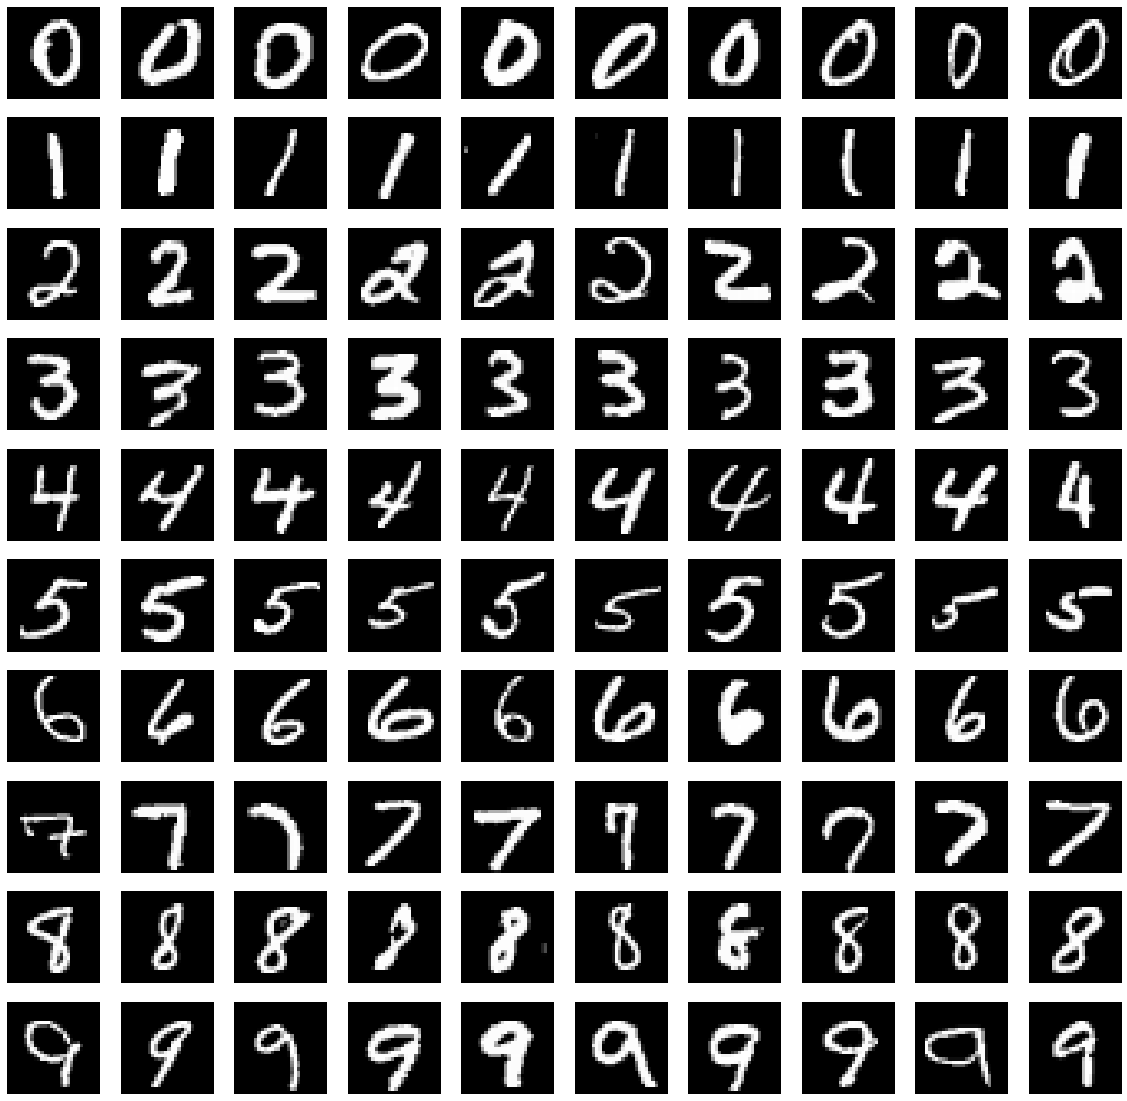

In [ ]:
def P1(num_examples=10):

### STUDENT START ###

    #Pull unique classes
    num_class=np.unique(Y)

    #Determine Pixle Dimensions for rendering the number matrix
    pix_dim = int(np.sqrt(len(X[1])))

    #Instatiate figure and axis of plot
    fig, ax = plt.subplots(len(num_class), num_examples, figsize = (20,20))

    #Loop over images and build visualization
    for col in range(len(num_class)):
      for row in range(num_examples):

            ax[col,row].imshow(X[Y == str(col)][row].reshape(pix_dim, pix_dim), cmap=plt.cm.gray)
            ax[col,row].axis('off')

    plt.show();

### STUDENT END ###

P1(10)

### Part 2:

Produce k-Nearest Neighbors models with k $\in$ [1,3,5,7,9].  Evaluate and show the accuracy of each model. For the 1-Nearest Neighbor model, additionally show the precision, recall, and F1 for each label. Which digit is the most difficult for the 1-Nearest Neighbor model to recognize?

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `classification_report` to get precision, recall, and F1 results.

In [ ]:
def P2(k_values):
### STUDENT START ###

    #Set the training data
    for index in k_values:

        #Initiate KNN Classifier and set the number of neighbors to the K_value
        #array
        nn = KNeighborsClassifier(n_neighbors = index)

        #Fit the KNN model with the mini trainign data
        nn.fit(mini_train_data, mini_train_labels)

        #Print accruacy of model
        print("Mean Accuracy Score for ", index,":",nn.score(dev_data, dev_labels))
        
        #Logic Gate if K_value equals 1
        if(index == 1):
            print(classification_report(dev_labels, nn.predict(dev_data))) 

### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

NameError: ignored

ANSWER:

Which digit is the most difficult for the 1-Nearest Neighbor model to recognize?

8 has the lowest F1 score, or the harmonic mean between accuracy and precision, indicating it is the most difficult integer for the 1-NN model to recognize.

### Part 3:

Produce 1-Nearest Neighbor models using training data of various sizes.  Evaluate and show the performance of each model.  Additionally, show the time needed to measure the performance of each model.

Notes:
* Train on subsets of the train set.  For each subset, take just the first part of the train set without re-ordering.
* Evaluate on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `time.time()` to measure elapsed time of operations.

In [ ]:
def P3(train_sizes, accuracies):

### STUDENT START ###

    for index in train_sizes:
      #Set a variable to be the partition of the training data
      train_data_part_three = train_data[0:index]
      train_labels_part_three = train_labels[0:index]
      
      #Initiate the KNN classifier
      nn = KNeighborsClassifier(n_neighbors=1)

      #fit KNN with training data
      nn.fit(train_data_part_three, train_labels_part_three)

      #Record the start time of the dev evaluation
      start_time = time.time()

      #Evaluate
      nn_score = nn.score(dev_data, dev_labels)
      accuracies.append(nn_score)

      #Record the end time of the dev evaluation
      end_time = time.time()

      #Print the results
      print("The accuracy Score for training size of", index,":",nn_score,
            "and the evaluation was completed in", end_time - start_time, "secconds.")


### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
accuracies = []
P3(train_sizes, accuracies)

The accuracy Score for training size of 100 : 0.702 and the evaluation was completed in 0.17394781112670898 secconds.
The accuracy Score for training size of 200 : 0.791 and the evaluation was completed in 0.33913636207580566 secconds.
The accuracy Score for training size of 400 : 0.811 and the evaluation was completed in 0.6545872688293457 secconds.
The accuracy Score for training size of 800 : 0.866 and the evaluation was completed in 1.2757315635681152 secconds.
The accuracy Score for training size of 1600 : 0.905 and the evaluation was completed in 2.5929596424102783 secconds.
The accuracy Score for training size of 3200 : 0.927 and the evaluation was completed in 5.400473594665527 secconds.
The accuracy Score for training size of 6400 : 0.939 and the evaluation was completed in 10.883846998214722 secconds.
The accuracy Score for training size of 12800 : 0.952 and the evaluation was completed in 21.78246283531189 secconds.
The accuracy Score for training size of 25600 : 0.963 and t

### Part 4:

Produce a linear regression model that predicts accuracy of a 1-Nearest Neighbor model given training set size. Show $R^2$ of the linear regression model.  Show the accuracies predicted for training set sizes 60000, 120000, and 1000000.  Show a lineplot of actual accuracies and predicted accuracies vs. training set size over the range of training set sizes in the training data.  What's wrong with using linear regression here?

Apply a transformation to the predictor features and a transformation to the outcome that make the predictions more reasonable.  Show $R^2$ of the improved linear regression model.  Show the accuracies predicted for training set sizes 60000, 120000, and 1000000.  Show a lineplot of actual accuracies and predicted accuracies vs. training set size over the range of training set sizes in the training data - be sure to display accuracies and training set sizes in appropriate units.

Notes:
* Train the linear regression models on all of the (transformed) accuracies estimated in Problem 3.
* Evaluate the linear regression models on all of the (transformed) accuracies estimated in Problem 3.
* You can use `LinearRegression` to produce a linear regression model.
* Remember that the sklearn `fit()` functions take an input matrix X and output vector Y. So, each input example in X is a vector, even if it contains only a single value.
* Hint re: predictor feature transform: Accuracy increases with training set size logarithmically.
* Hint re: outcome transform: When y is a number in range 0 to 1, then odds(y)=y/(1-y) is a number in range 0 to infinity.

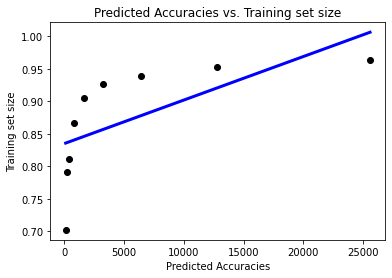

R Squared Score of Linear Model 0.4177006634161019
Predicted accuracies for 60000 is 1.2361731707874237
Predicted accuracies for 120000 is 1.637428053637104
Predicted accuracies for 1000000 is 7.522499668765751



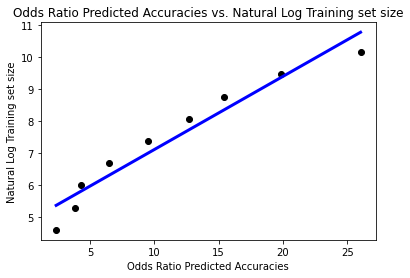

R Squared Score for the Transformed Linear Model 0.9395242859897991
Predicted accuracies for 60000.00000000002 is 0.9999833336111065
Predicted accuracies for 120000.00000000006 is 0.9999916667361105
Predicted accuracies for 999999.9999999995 is 0.999999000001


In [ ]:
def P4():

### STUDENT START ###
    # Reshape data from 1D Array to 2D Array
    train_data_p4 = np.reshape(train_sizes, (9,1))
    train_label_p4 = accuracies
    

    # Build "test data" matrix
    datap4 = [60000, 120000, 1000000]
    data_p4 = np.reshape(datap4, (3,1))


    # Log Transform train_sizes 
    trans_train_label_p4 = np.reshape(np.log(train_sizes), (9,1))
    trans_data_4 = np.reshape(np.log(datap4), (3,1))


    # Odds Ration Transformation on accuracies
    trans_accuracies = []

    for index in range(len(accuracies)):
      trans_accuracies.append(accuracies[index] / (1 - accuracies[index]))

    trans_accuracies = np.reshape(trans_accuracies, (9,1))


    # Make Linear Regression Object
    regr = LinearRegression()


    # Train the Regression Model with Training Data
    regr.fit(train_data_p4, train_label_p4)


    # Evaluate model on all of P3 accuracies
    p3_predict = regr.predict(train_data_p4)


    # Calculate R Squared for linear regression model
    p3_predict_rsqd = regr.score(train_data_p4, train_label_p4)


    # Calculate accuracies for [[60000, 120000, 1000000]]
    p4_predict = regr.predict(data_p4)


    # Generate Plot for Predicted Accuracies vs. Training set size
    plt.scatter(train_data_p4, train_label_p4, color = 'black')
    plt.plot(train_data_p4, p3_predict, color = 'blue',  linewidth = 3)

    plt.title('Predicted Accuracies vs. Training set size')
    plt.xlabel("Predicted Accuracies")
    plt.ylabel("Training set size")

    plt.show()


    # Show Calculated R Squared Values
    print('R Squared Score of Linear Model', p3_predict_rsqd)


    # Show predicted accuracies of p4 data
    for index in range(len(data_p4)):
        print('Predicted accuracies for',data_p4[index][0], 'is', 
              p4_predict[index])
    print("")


    # Evaluate model on all of P3 accuracies transformed
    regr.fit(trans_accuracies, trans_train_label_p4)


    # Evaluate model on all the new p4 trainign set sized
    trans_p3_predict = regr.predict(trans_accuracies) 


    # Calculate R Squared for linear regression model
    trans_p3_predict_rsqd = regr.score(trans_accuracies, trans_train_label_p4)


    # Calculate accuracies for log transformed [[60000, 120000, 1000000]]
    trans_p4_predict = regr.predict(trans_data_4)


    # Generate Plot for Trans Predicted Accuracies vs. Trans Training set size
    plt.scatter(trans_accuracies, trans_train_label_p4, color = 'black')
    plt.plot(trans_accuracies, trans_p3_predict, color = 'blue',  linewidth = 3)

    plt.title('Odds Ratio Predicted Accuracies vs. Natural Log Training set size')
    plt.xlabel("Odds Ratio Predicted Accuracies")
    plt.ylabel("Natural Log Training set size")

    plt.show()


    # Show Calculated R Squared Values for Transformed Model
    print('R Squared Score for the Transformed Linear Model', 
          trans_p3_predict_rsqd)
    
    # Show predicted accuracies of p4 data
    trans_data_4 = np.exp(trans_data_4)

    # Return odds ratios back into percentages
    trans_data_per =[]
    for index in range(len(trans_data_4)):
      trans_data_per.append(trans_data_4[index] / 
                            (trans_data_4[index] + 1))
      
    # Print out predicted accuracies for transformed data
    for index in range(len(trans_data_4)):
      print('Predicted accuracies for',trans_data_4[index][0], 'is', 
            trans_data_per[index][0])
    
### STUDENT END ###

P4()

ANSWER: What's wrong with using linear regression here?

Linear regression is not appropriate in the raw form (first case) because the data does not fit the linear model well, as seen by the first graph. In addition, when we predict accuracies with the raw model we see percentages over 100%. It is not possible to have over 100%, therefore we must apply a transformation to the data in order to develop a better fitting model.


### Part 5:

Produce a 1-Nearest Neighbor model and show the confusion matrix. Which pair of digits does the model confuse most often? Show the images of these most often confused digits.

Notes:
- Train on the mini train set.
- Evaluate performance on the dev set.
- You can use `confusion_matrix()` to produce a confusion matrix.

[[101   0   1   0   0   0   1   1   2   0]
 [  0 116   1   0   0   0   0   0   1   0]
 [  1   4  84   2   2   0   2   4   6   1]
 [  0   2   0  84   0   6   0   2   3   0]
 [  0   0   1   0  78   0   0   2   0  11]
 [  2   0   0   1   1  77   5   0   2   0]
 [  1   2   1   0   1   2  94   0   1   0]
 [  0   1   1   0   0   0   0  96   0   4]
 [  1   5   4   3   1   3   0   1  72   4]
 [  0   1   0   0   3   2   0   7   0  82]]


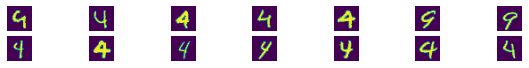

In [ ]:
def P5():

### STUDENT START ###
    # Create the KNN Object
    nn_p5 = KNeighborsClassifier(n_neighbors = 1)

    # Train on the mini training set
    nn_p5.fit(mini_train_data, mini_train_labels)

    # Evaluate the on the model set
    predicted_label_p5 = nn_p5.predict(dev_data)

    # Make confusion matrix
    cm_p5 = confusion_matrix(dev_labels, predicted_label_p5)
    # ADD LABELS TO THE CONFUSION MATRIX

    # Show the confusion matrix
    print(cm_p5)

    # Convert to a triangular matrix
        # Come back to this to generalize and automaticly choose largest number
        # Matrix operation to do this

    # Generate a list of mistaken numbers
    mistaken_numbers = []
    for index in range(len(dev_data)):
      if((dev_labels[index] == '4' and predicted_label_p5[index] == '9') or 
         (dev_labels[index] == '9' and predicted_label_p5[index] == '4')):
        mistaken_numbers.append(dev_data[index])

    #Show images of most often conused matrix (Find the maximum number)
    fig, ax = plt.subplots(2, 7, figsize = (10,1))
    
    count_p5 = 0
    for r in range(2):
      for c in range(7):
        ax[r,c].imshow(mistaken_numbers[count_p5].reshape(pix_dim, pix_dim))
        ax[r,c].axis('off')
        count_p5 += 1
       
    plt.rc('image', cmap='binary', interpolation='none')

### STUDENT END ###

P5()

ANSWER: Which pair of digits does the model confuse most often? 

The Number 4 and 9 are the most confuesed in this dataset wtih a sum of 14 images confused. 

### Part 6:

A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian, i.e., the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur filter by just using the 8 neighboring pixels like this: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values.

Pick a weight, then produce and evaluate four 1-Nearest Neighbor models by applying your blur filter in these ways:
- Do not use the filter
- Filter the training data but not the dev data
- Filter the dev data but not the training data
- Filter both training data and dev data

Show the accuracies of the four models evaluated as described.  Try to pick a weight that makes one model's accuracy at least 0.9.

Notes:
* Train on the (filtered) mini train set.
* Evaluate performance on the (filtered) dev set.
* There are other Guassian blur filters available, for example in `scipy.ndimage.filters`. You are welcome to experiment with those, but you are likely to get the best results with the simplified version described above.

In [ ]:
def P6():
    
### STUDENT START ###
    # Generate 3x3 kernal with weight x for filter
    g_filter = build_kernal()

    # Apply the Filter to the images
    filtered_training_data =gaussian_filter(pad_image(mini_train_data),g_filter)
    filtered_dev_data = gaussian_filter(pad_image(dev_data),g_filter)

    # Generate KNN Classifier
    clf = KNeighborsClassifier()

    # Do not use the filter
    clf.fit(mini_train_data, mini_train_labels)
    print("Accuracy Score for No Filter:", clf.score(dev_data, dev_labels))

    # Filter the training data but not the dev data
    clf = KNeighborsClassifier()
    clf.fit(filtered_training_data, mini_train_labels)
    print("Accuracy Score for Filtered Training Data Only:", 
          clf.score(dev_data, dev_labels))

    # Filter the dev data but not the training data
    clf = KNeighborsClassifier()
    clf.fit(mini_train_data, mini_train_labels)
    print("Accuracy Score for Filter on Dev Data Only:", 
          clf.score(filtered_dev_data, dev_labels))

    # Filter both training data and dev data
    clf = KNeighborsClassifier()
    clf.fit(filtered_training_data, mini_train_labels)
    print("Accuracy Score for Filtered:", 
          clf.score(filtered_dev_data, dev_labels))


# Define the 3X3 gaussian kernal
def build_kernal(weight = 1):
  kernal = [1/16, 1/8, 1/16,
            1/8, 1/4, 1/8,
            1/16, 1/8, 1/16]

  return np.dot(weight,kernal)


# Input the array of images and it will output an array of padded
# Images results in a 30X30 Matrix
def pad_image(image_list):
  output = []
  for i in range(len(image_list)):
    temp = np.array(image_list[i]).reshape(28,28)
    temp = np.pad(temp, 1, pad_with)
    output.append(temp)

  return output


# Convolves the array of images with the gaussian_filter
def gaussian_filter(image_list, gaussian_filter):
  # Build a nested loop function to recures through and recalculated
  filtered_image_list = []
  for image in range(len(image_list)):
    filtered_image = []
    for row in range(1,29):
      # temp = []
      for col in range(1,29):
        # Build the sub matrix from the image
        sub_matrix = [image_list[image][row-1][col-1],image_list[image][row-1][col], image_list[image][row-1][col+1],
                      image_list[image][row][col-1],image_list[image][row][col], image_list[image][row][col+1],
                      image_list[image][row+1][col-1],image_list[image][row+1][col], image_list[image][row+1][col+1]]

        # Dotproduct the submatrix with the g_filter
        filtered_matrix = np.convolve(sub_matrix,gaussian_filter, 'valid')

        # Sum matrix and add it to a new row array
        # temp.append(filtered_matrix[0])
        filtered_image.append(filtered_matrix[0])

      #Add to a row array to image array
      #filtered_image.append(temp)

    # Add new Image array to image list
    filtered_image_list.append(filtered_image)
  
  return filtered_image_list


# Pad Numpy Array (Source: Numpy Documentation)
# https://numpy.org/devdocs/reference/generated/numpy.pad.html
def pad_with(vector, pad_width, iaxis, kwargs):

    pad_value = kwargs.get('padder', 0)
    vector[:pad_width[0]] = pad_value
    vector[-pad_width[1]:] = pad_value


### STUDENT END ###

P6()

Accuracy Score for No Filter: 0.882
Accuracy Score for Filtered Training Data Only: 0.9
Accuracy Score for Filter on Dev Data Only: 0.876
Accuracy Score for Filtered: 0.903


### Part 7:

Produce two Naive Bayes models and evaluate their performances.  Recall that Naive Bayes estimates P(feature|label), where each label is a categorical, not a real number.

For the first model, map pixel values to either 0 or 1, representing white or black - you should pre-process the data or use `BernoulliNB`'s `binarize` parameter to set the white/black separation threshold to 0.1.  Use `BernoulliNB` to produce the model.

For the second model, map pixel values to either 0, 1, or 2, representing white, gray, or black - you should pre-process the data, seting the white/gray/black separation thresholds to 0.1 and 0.9.  Use `MultinomialNB` to produce the model. 

Show the Bernoulli model accuracy and the Multinomial model accuracy.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* `sklearn`'s Naive Bayes methods can handle real numbers, but for this exercise explicitly do the mapping to categoricals. 

Does the multinomial version improve the results? Why or why not?

In [ ]:
def P7():

### STUDENT START ###
    # Generate Bernoulli NB Classifier
    bnb_class = BernoulliNB(alpha=1.0, binarize=0.1)

    # Fit based on mini training data
    bnb_class.fit(mini_train_data, mini_train_labels)

    # Calculate the performance on the dev data
    bnb_score = bnb_class.score(dev_data, dev_labels)

    # Preprocess data
    mnb_trinerized_data = trinerize(mini_train_data, 0.1, 0.9)

    # Build a Confusion Matrix
    cm_p7_a = confusion_matrix(dev_labels, bnb_class.predict(dev_data))
    print('BernoulliNB')
    print(cm_p7_a)
    print('')

    # Generate Multinomial NB Classifier
    mnb_class = MultinomialNB(alpha = 1.0)

    # Fit based on mini training data
    mnb_class.fit(mnb_trinerized_data, mini_train_labels)

    # Calculate the performacne on the dev data
    mnb_score = mnb_class.score(dev_data, dev_labels)

    # Confustion Matrix for Multinomial
    cm_p7_b = confusion_matrix(dev_labels, mnb_class.predict(dev_data))
    print('MultinomialNB')
    print(cm_p7_b)
    print('')

    # Print performance
    print("Performance for Bernoulli NB is:", bnb_score)
    print("Performance for Multinomial NB is:", mnb_score)



# Categorize data in to 0, 1, 2 based on threshold
def trinerize(data_set, threshold_1, threshold_2):
  return_array = []
  
  for row in range(len(data_set)):
    temp = []
    for col in range(len(data_set[row])):
      if (data_set[row][col] <= threshold_1):
        temp.append(0)
      elif (data_set[row][col] >= threshold_2):
        temp.append(2)
      else:
        temp.append(1)
    return_array.append(temp)

  return return_array

# Categorize data in to 0, 1, 2 based on threshold
def binerize(data_set, threshold_1):
  return_array = []
  
  for row in range(len(data_set)):
    temp = []
    for col in range(len(data_set[row])):
      if (data_set[row][col] <= threshold_1):
        temp.append(0)
      else:
        temp.append(1)
    return_array.append(temp)

  return return_array
    
### STUDENT END ###

P7()

BernoulliNB
[[ 95   0   2   1   0   4   2   0   2   0]
 [  0 112   2   1   0   0   0   0   3   0]
 [  3   1  76   2   6   0   4   3  11   0]
 [  1   2   5  74   2   2   0   0   8   3]
 [  0   0   1   0  78   0   2   0   2   9]
 [  2   0   0  14   3  60   4   0   4   1]
 [  0   2   2   0   3   3  90   0   2   0]
 [  1   1   1   0   5   0   0  88   1   5]
 [  0   5   5   8   1   3   1   0  68   3]
 [  0   4   0   0   5   0   0   9   4  73]]

MultinomialNB
[[ 97   0   2   2   1   1   0   0   3   0]
 [  0 103   3   1   0   0   0   0  11   0]
 [  3   1  78   2   4   0   4   1  12   1]
 [  1   2   6  74   2   1   0   0   7   4]
 [  0   0   0   0  74   0   2   0   2  14]
 [  2   0   1  11   3  59   4   0   7   1]
 [  0   2   2   0   2   3  91   0   2   0]
 [  1   0   2   1   2   0   1  88   2   5]
 [  0   7   5   7   1   4   0   0  67   3]
 [  0   3   0   0   8   0   0   3   5  76]]

Performance for Bernoulli NB is: 0.814
Performance for Multinomial NB is: 0.807


ANSWER: Does the multinomial version improve the results? Why or why not?

The Multinomial version does not improve the results over the Bernoulli model. In previous exercises we determined the numbers 4 and 9 are the most confused on the dataset. The Bernoulli maintains 14 occurrences of misidentification and the Multinomial has 22 occurrences of misidentification. 
 
The Bernoulli model converts the pixel to either a black or white, the Multinomial model converts only the top and bottom 10% to black or white and turns the rest  grey. This adds more uncertainty and results in less accurate predictions.


### Part 8:

Search across several values of the LaPlace smoothing parameter (alpha) to find its effect on a Bernoulli Naive Bayes model's performance.  Show the accuracy at each alpha value.

Notes:
* Set binarization threshold to 0.
* Train on the mini train set.
* Evaluate performance by 5-fold cross-validation. 
* Use `GridSearchCV(..., ..., cv=..., scoring='accuracy', iid=False)` to vary alpha and evaluate performance by cross-validation.
* Cross-validation is based on partitions of the training data, so results will be a bit different than if you had used the dev set to evaluate performance.

What is the best value for alpha? What is the accuracy when alpha is near 0? Is this what you'd expect?

In [ ]:
def P8(alphas):

### STUDENT START ###
    # Call the GridSearch CV funtion and setting parameters
    clf = GridSearchCV(BernoulliNB(), 
                       alphas,
                       cv = 5,
                       scoring='accuracy',
                       iid=False)
    
    # Train model with mini_train_data
    return clf.fit(mini_train_data, mini_train_labels)

    #Show results
    # nb.cv_results_

### STUDENT END ###

alphas = {'alpha': [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)
print()
print("Best alpha = ", nb.best_params_)


Best alpha =  {'alpha': 0.001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


ANSWER: What is the best value for alpha? What is the accuracy when alpha is near 0? Is this what you'd expect?

The best value for alpha for this data set is 0.001. When the alpha is near 0, the model performs similarly to an alpha between 0.1 and 0.5. This is expected as an alpha near 0 is essentially a model with no smoothing and a high alpha is a model with a higher smoothing rate. Smoothing helps generalize the model to perform better when it is exposed to new data by adjusting the probabilities to increase consideration to under-represented events in the data. Therefore we would expect a model with little to no smoothing or too much smoothing not perform as well as a model with just enough smoothing.

### Part 9:

Produce a model using Guassian Naive Bayes, which is intended for real-valued features, and evaluate performance. You will notice that it does not work so well. Diagnose the problem and apply a simple fix so that the model accuracy is around the same as for a Bernoulli Naive Bayes model. Show the model accuracy before your fix and the model accuracy after your fix.  Explain your solution.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* Consider the effects of theta and sigma.  These are stored in the model's `theta_` and `sigma_` attributes.

In [ ]:
def P9():

### STUDENT END ###
    # Create the model object
    clf = GaussianNB()

    # Train the model
    clf.fit(mini_train_data, mini_train_labels)

    # Evaluate Raw GNB Model
    gnb_score = clf.score(dev_data, dev_labels)

    # Attempted - Log Transform of data -> failed, errored due to 0 transformed
    #             to undefined
    # Attempted - Log transform of theta and sigma -> yielded 0.11
    # Attempted - Bionerization -> Improved score to 0.6

    # Identify the best smoothing attribute
    vs = {'var_smoothing': np.linspace(.01, 1, 100)}
    clf = GridSearchCV(GaussianNB(), 
                       vs,
                       cv = 5,
                       scoring='accuracy',
                       iid=False)
    
    clf.fit(mini_train_data, mini_train_labels)

    best_param = clf.best_params_

    #Train new model
    clf_b = GaussianNB(var_smoothing=0.04)
    clf_b.fit(mini_train_data, mini_train_labels)

    gnb_tran_score = clf_b.score(dev_data, dev_labels)


    print("Raw Score:", gnb_score)
    print('Best smoothing value=:', best_param)
    print('Post Fix (smoothing) Score:', gnb_tran_score)

### STUDENT END ###

P9()

NameError: ignored

ANSWER: Explain your solution.

The GaussianNB model is based on the Normal distribution and is a better fit with continuous data. Since our data is fairly concentrated near 0 and 256 (representing grey scale in the images) it creates a high, narrow distribution. The Variance Smoothing adds the defined variance (in our case 0.04) to the distributions variance, thus widening the curve.

### Part 10:

Because Naive Bayes produces a generative model, you can use it to generate digit images.

Produce a Bernoulli Naive Bayes model and then use it to generate a 10x20 grid with 20 example images of each digit. Each pixel output should be either 0 or 1, based on comparing some randomly generated number to the estimated probability of the pixel being either 0 or 1.  Show the grid.

Notes:
* You can use np.random.rand() to generate random numbers from a uniform distribution.
* The estimated probability of each pixel being 0 or 1 is stored in the model's `feature_log_prob_` attribute. You can use `np.exp()` to convert a log probability back to a probability.

How do the generated digit images compare to the training digit images?

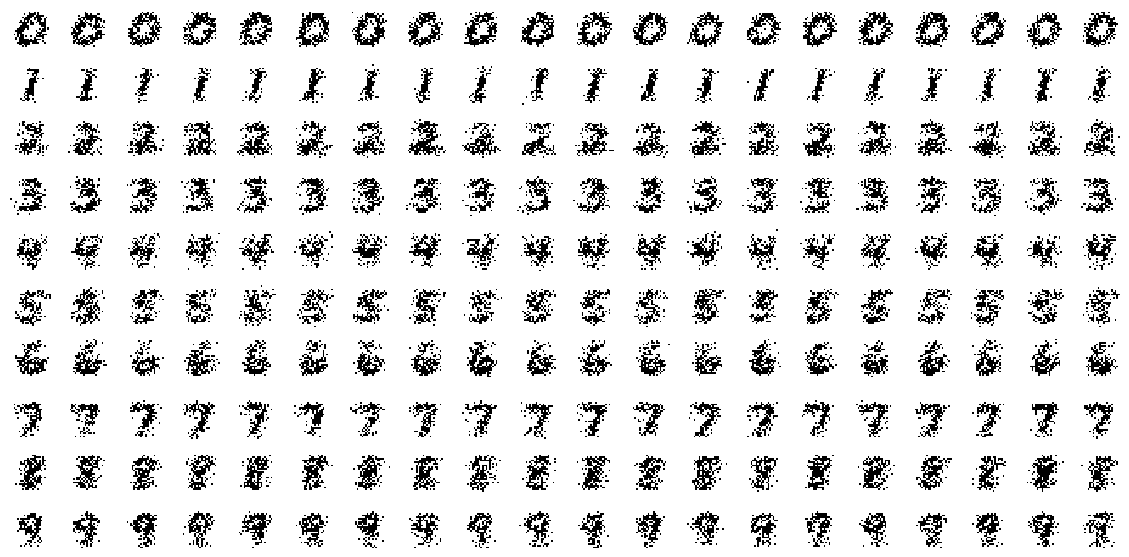

In [ ]:
def P10(num_examples):

### STUDENT START ###
    # Generate and train model
    clf = BernoulliNB(alpha=0.001, binarize=0.1)
    clf.fit(train_data, train_labels)

    # Create plot object for images
    fig, ax = plt.subplots(10, 20, figsize = (20,10))

    # Loop to generate random numbers, compare to probabilities, and generate
    # image plot.
    for i in range(10):
      for j in range(20):
        # Pull probability from number i
        probabilities = np.exp(clf.feature_log_prob_[i])

        # Generate random numbers betweeen 0-1
        rn = np.random.rand(1,len(probabilities))[0]

        # Compare probabilities of numbers to random numbers, turn pixel either
        # Black or White
        image = []
        for index in range(len(rn)):
          if (rn[index] > probabilities[index]):
            image.append(0)
          else: 
            image.append(1)

        # Convert array to an np array for display
        image = np.array(image)

        # Generate image from pixle array
        ax[i,j].imshow(image.reshape(28, 28))
        ax[i,j].axis('off')
        plt.rc('image', cmap='binary', interpolation='none')

    plt.show();

### STUDENT END ###

P10(20)

ANSWER:How do the generated digit images compare to the training digit images?

There is a general sense of the number image, compared to the training images, however the images are "fuzzy" at best. I believe this is due to the randomly generated array and the probabilistic nature of the classifier. 


### Part 11:

Recall that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior probability of the predicted class is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior probability and accuracy.  

Produce a Bernoulli Naive Bayes model.  Evaluate performance: partition the dev set into several buckets based on the posterior probabilities of the predicted classes - think of a bin in a histogram- and then estimate the accuracy for each bucket. So, for each prediction, find the bucket to which the maximum posterior probability belongs, and update "correct" and "total" counters accordingly.  Show the accuracy for each bucket.

Notes:
* Set LaPlace smoothing (alpha) to the optimal value (from part 8).
* Set binarization threshold to 0.
* Train on the mini train set.
* Evaluate perfromance on the dev set.

How would you characterize the calibration for this Bernoulli Naive Bayes model?

In [ ]:
def P11(buckets, correct, total):
    
### STUDENT START ###
    clf = BernoulliNB(alpha=0.001, binarize=0)
    clf.fit(mini_train_data, mini_train_labels)

    # Retrieve the probabilities the image is a specific number
    prob_dump = clf.predict_proba(dev_data)

    # Pull the maximum probability, this is the prediction
    posterior = np.max(prob_dump, axis = 1)

    # Pull the index of the maximum probability, this will be the label
    posterior_label = np.argmax(prob_dump, axis = 1)

    # Iterate over list
    for index in range(len(posterior)):
      for bucket in range(1, len(buckets)):
        if (posterior[index] > buckets[bucket-1] and
            posterior[index] <= buckets[bucket]):
          total[bucket] += 1
          
          # Test to see if the labels match
          if (posterior_label[index] == int(dev_labels[index])):
            correct[bucket] += 1

                
### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
     accuracy = 0.0
     if (total[i] > 0): accuracy = correct[i] / total[i]
     print('p(pred) is %.13f to %.13f    total = %3d    accuracy = %.3f' % (0 if i==0 else buckets[i-1], buckets[i], total[i], accuracy))

p(pred) is 0.0000000000000 to 0.5000000000000    total =   0    accuracy = 0.000
p(pred) is 0.5000000000000 to 0.9000000000000    total =  31    accuracy = 0.355
p(pred) is 0.9000000000000 to 0.9990000000000    total =  67    accuracy = 0.433
p(pred) is 0.9990000000000 to 0.9999900000000    total =  59    accuracy = 0.458
p(pred) is 0.9999900000000 to 0.9999999000000    total =  46    accuracy = 0.652
p(pred) is 0.9999999000000 to 0.9999999990000    total =  62    accuracy = 0.774
p(pred) is 0.9999999990000 to 0.9999999999900    total =  33    accuracy = 0.788
p(pred) is 0.9999999999900 to 0.9999999999999    total =  43    accuracy = 0.791
p(pred) is 0.9999999999999 to 1.0000000000000    total = 659    accuracy = 0.938


ANSWER: How would you characterize the calibration for this Bernoulli Naive Bayes model?

I would classify the Bernoulli Naive Bayes model as a weakly calibrated classifier indicated by the accuracy breakdown noted above. As the buckets of probability approach 1, the accuracy of the model improves. 

### Part 12 EXTRA CREDIT:

Design new features to see if you can produce a Bernoulli Naive Bayes model with better performance.  Show the accuracy of a model based on the original features and the accuracy of the model based on the new features.

Here are a few ideas to get you started:
- Try summing or averaging the pixel values in each row.
- Try summing or averaging the pixel values in each column.
- Try summing or averaging the pixel values in each square block. (pick various block sizes)
- Try counting the number of enclosed regions. (8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0)

Notes:
* Train on the mini train set (enhanced to comprise the new features).
* Evaulate performance on the dev set.
* Ensure that your code is well commented.

In [ ]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()